<h3> Mock Interview Python Screening test </h3>


In [37]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

In [38]:
df = pd.read_csv("desktop/adult_census_data.csv")

In [39]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [40]:
df.columns = df.columns.str.replace(" ", "")
df.columns

Index(['39', 'State-gov', '77516', 'Bachelors', '13', 'Never-married',
       'Adm-clerical', 'Not-in-family', 'White', 'Male', '2174', '0', '40',
       'United-States', '<=50K'],
      dtype='object')

### Drop Useless Columns

In [41]:
df = df.drop(columns=['2174', '0', '40', '39', '13', '77516'], axis = 1)

### Rename Columns

In [42]:
df = df.rename(columns = {"State-gov": "Employment Type",
                          "Bachelors": "Degree Status",
                          "Never-married": "Marriage-Status",
                          "Adm-clerical": "Job-Role",
                          "Not-in-family": "Family-Role",
                          "White": "Etnicity",
                          "Male": "Gender", 
                          "United-States": "Country",
                          "<=50K": "Earnings"})

### Total Count of Each Job Role

Text(0.5, 1.0, 'Total Count of Each Job Role')

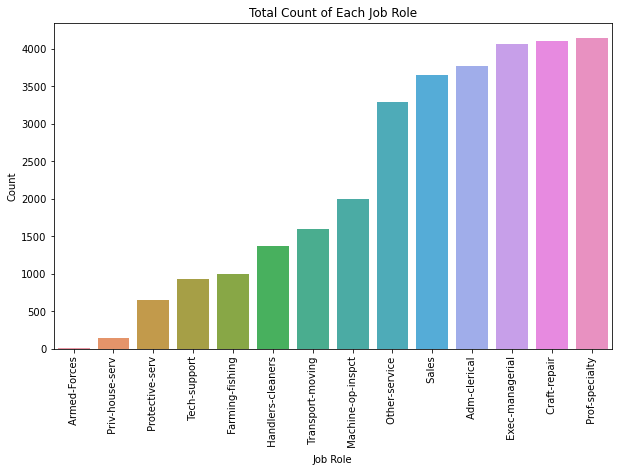

In [43]:
drop_index = df[df["Job-Role"] == " ?"].index

df.drop(drop_index, inplace = True)

role_count = df["Job-Role"].value_counts().sort_values(ascending = True).reset_index().rename(columns= {"index":"Job Role", "Job-Role": "Count"})

plt.figure(figsize = (10, 6))
sns.barplot(data = role_count, x = "Job Role", y = "Count")
plt.xticks(rotation = 90)
plt.title("Total Count of Each Job Role")

### Number of individuals who have a High School Graduate Diploma AND earn <=50K/>=50K in the US

In [44]:
num_of_50up_hs = len(df[(df["Degree Status"] == ' HS-grad') 
                        & (df["Earnings"] == ' <=50K') 
                        & (df["Country"] == " United-States")])
num_of_50below_hs = len(df[(df["Degree Status"] == ' HS-grad') 
                           & (df["Earnings"] == ' >50K') 
                           & (df["Country"] == " United-States")])

print("The number of individuals who have a High School Graduate Diploma AND earn <=50K in the US is", num_of_50up_hs)
print("The number of individuals who have a High School Graduate Diploma AND earn >50K in the US is", num_of_50below_hs)

The number of individuals who have a High School Graduate Diploma AND earn <=50K in the US is 7668
The number of individuals who have a High School Graduate Diploma AND earn >50K in the US is 1541


### Job Role that has the highest proportion of individuals who earn >50K

In [57]:
temp1 = df.groupby("Job-Role")["Earnings"].value_counts().to_frame("Count").reset_index()

In [63]:
temp2 = df.groupby("Job-Role")["Earnings"].count().reset_index().rename(columns={"Earnings":"Sum"})
earnings_df = pd.merge(temp1, temp2, on="Job-Role")
earnings_df["perc"] =(earnings_df["Count"] / earnings_df["Sum"]) * 100

In [65]:
top_perc = earnings_df.loc[earnings_df["Earnings"] == " >50K", "perc"].sort_values(ascending = False).tolist()[0]

list = earnings_df["Job-Role"].where(earnings_df["perc"] == top_perc).tolist()

top_role = [x for x in list if pd.isnull(x) == False][0]

print(top_role, "has the highest proportion of individuals who earn >50K, which is ", round(top_perc, 2), "%.")

 Exec-managerial has the highest proportion of individuals who earn >50K, which is  48.4 %.
